In [1]:
import numpy as np
from statsmodels.stats.multitest import multipletests
import pandas as pd
import glob
import h5py
import re
from scipy.signal import convolve
from tqdm import tqdm
import scipy.io as sio
import os
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import tqdm
import itertools

plt.rcParams.update({'font.size': 22})

In [2]:
'''load regression info'''

root_dir = '/dartfs-hpc/scratch/f005d7d/what_where_analysis/'
figure_data_dir = '/dartfs-hpc/rc/home/d/f005d7d/attn-rnn/what_where_analysis/what-where-task-analysis/figures'
processed_path = os.path.join(root_dir, 'processed/')

with open(os.path.join(processed_path, 'all_sess_decoding_info.pkl'), 'rb') as f:
    all_sess_regression_info = pickle.load(f)

In [3]:
all_sess_accs = np.stack(all_sess_regression_info['accs'], axis=0).transpose((1,2,0,3))
num_areas, num_timesteps, num_tests, num_samples = all_sess_accs.shape

binsize = 0.01
# gauss_SD = 0.02/binsize
win_size = int(0.05/binsize)
stride = int(0.05/binsize)
xxx = np.linspace(-1500, 1500-stride*binsize*1000, num=num_timesteps)



## Decoding accuracies

In [4]:
def plot_mean_se(ax, xxx, yyy, color, linestyle, label, axis):
    mean = yyy.mean(axis)
    se = yyy.std(axis)/np.sqrt(yyy.shape[axis])
    ax.plot(xxx, mean, c=color, ls=linestyle, label=label, lw=3)
    ax.fill_between(xxx, mean-se, mean+se, color=color, alpha=0.2)
    

(60, 4, 8)
(60, 4, 8)
(60, 4, 8)


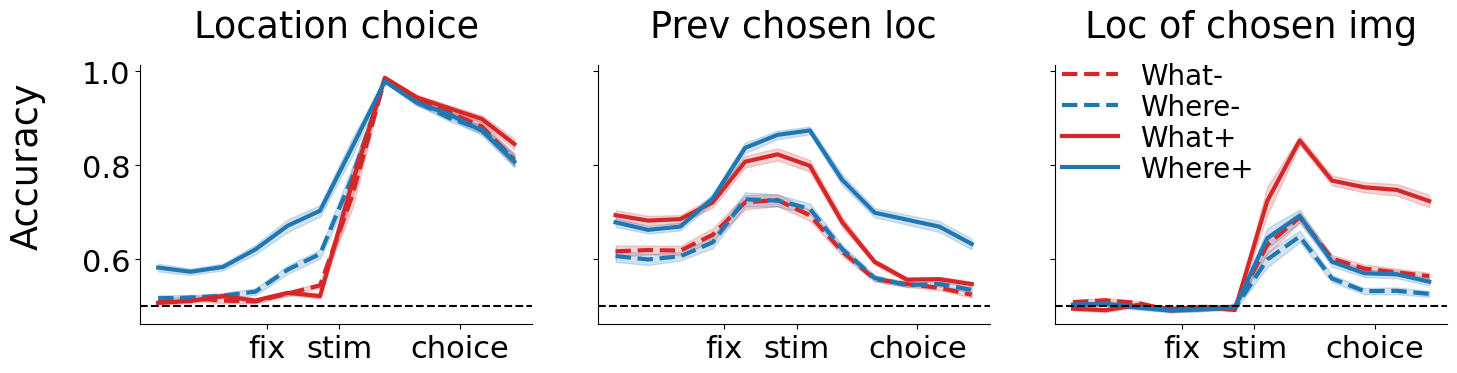

In [5]:
fig, axes = plt.subplots(1,3, figsize=(15, 4.2), sharey=True, sharex=True)

colors = ['tab:red', 'tab:blue']
linestyles = ['--', '-']

block_type_labels=['What', 'Where']
rwd_labels=['-', '+']

for i in range(3):
    curr_test_accs = all_sess_accs[:,i*4:(i+1)*4].mean(-1)
    print(curr_test_accs.shape)
    for idx_rwd in range(2):
        for idx_block_type in range(2):
            plot_mean_se(axes[i], xxx, 
                         curr_test_accs[:,idx_rwd*2+idx_block_type].reshape(num_timesteps, -1),
                         color=colors[idx_block_type], linestyle=linestyles[idx_rwd], 
                         label=block_type_labels[idx_block_type]+rwd_labels[idx_rwd],
                         axis=-1)

axes[-1].legend(bbox_to_anchor=(0.57, 0.45), frameon=False, labelspacing=0.1, fontsize=20)
            
for ax in axes:
    ax.axhline(0.5, ls='--', c='k')
    ax.set_xticks([-600, 0, 1000], ['fix', 'stim', 'choice'])
#     ylims = [0.05-(ax.get_ylim()[1]-0.05)*0.05, ax.get_ylim()[1]]
#     ax.set_ylim(ylims)
#         a.axhline(thresh, ls=':', c='k')
    xlims = ax.get_xlim()
    ax.set_xlim(xlims)

axes[0].set_title('Location choice', pad=20)
axes[1].set_title('Prev chosen loc', pad=20)
axes[2].set_title('Loc of chosen img', pad=20)
        
sns.despine()
fig.supylabel('Accuracy', y=0.55)

fig.tight_layout()

